## Prerequisites

Import the necessary python libraries to do the exploratory data analysis, also creates a copy of the original CSV files to conserve the raw data.

In [2125]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

#from jupyterthemes import jtplot
#jtplot.style()

plt.style.use('bmh')

#carroya_original = pd.read_csv('carroya_data.csv', index_col=[0])
carroya_original = pd.read_csv('carroya_data.csv')
tucarro_original = pd.read_csv('tucarro_data.csv')
carroya_df = carroya_original.copy()
tucarro_df = tucarro_original.copy()
#carroya_df = carroya_df.rename(columns = {'SUBTITULO' : 'MODELO'})

## First glance at the datasets

### CarroYa

In [2126]:
carroya_df.head()

,Unnamed: 0,NOMBRE,SUBTITULO,PRECIO,PRECIO MENSUAL,KILOMETRAJE,ANIO,TIPO DE CAJA,CILINDRAJE,COMBUSTIBLE,COLOR,ESTADO,UBICACIÓN,DIRECCIÓN,PLACA,PUERTAS,AIRBAGS,IMAGEN
0,0,Mercedes Benz Clase GLA,200 Automatico,$122.900.000,$3.058.891,22.036 km,2020,Secuencial,1.6,Gasolina,Blanco,usado,Bogotá D.C.,NaN,**5 Bogota,NaN,Airbags,https://www.carroya.com/web/images/vehiculos/2...
1,1,Volkswagen Tiguan,2.0 Comfortline 4MOTION,$99.900.000,$2.486.438,39.024 km,2018,Secuencial,2.0,Gasolina,Otro,usado,Bogotá D.C.,NaN,**6 Bogota,NaN,Airbags,https://www.carroya.com/web/images/vehiculos/2...
2,2,Jaguar XE,Prestige 2.0 T,$102.900.000,$2.561.105,15.192 km,2017,Secuencial,2.0,Gasolina,Negro,usado,Bogotá D.C.,NaN,**3 Bogota,NaN,Airbags,https://www.carroya.com/web/images/vehiculos/2...
3,3,Mitsubishi Outlander,Phev,$105.900.000,$2.635.773,46.690 km,2017,Automática,2.0,Híbrido,Gris,usado,Bogotá D.C.,NaN,**8 Bogota,NaN,Airbags,https://www.carroya.com/web/images/vehiculos/2...
4,4,Mercedes Benz Clase CLA,200,$122.900.000,$3.058.891,22.036 km,2020,Automática,1.6,Gasolina,Blanco,usado,Bogotá D.C.,NaN,**5 Bogota,NaN,Airbags,https://www.carroya.com/web/images/vehiculos/2...


In [2127]:
carroya_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10880 entries, 0 to 10879
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10880 non-null  int64  
 1   NOMBRE          10880 non-null  object 
 2   SUBTITULO       6977 non-null   object 
 3   PRECIO          10880 non-null  object 
 4   PRECIO MENSUAL  10880 non-null  object 
 5   KILOMETRAJE     10880 non-null  object 
 6   ANIO            10880 non-null  int64  
 7   TIPO DE CAJA    10852 non-null  object 
 8   CILINDRAJE      10880 non-null  float64
 9   COMBUSTIBLE     9616 non-null   object 
 10  COLOR           10787 non-null  object 
 11  ESTADO          10880 non-null  object 
 12  UBICACIÓN       10880 non-null  object 
 13  DIRECCIÓN       7811 non-null   object 
 14  PLACA           10200 non-null  object 
 15  PUERTAS         695 non-null    float64
 16  AIRBAGS         1923 non-null   object 
 17  IMAGEN          10880 non-null 

Some numeric columns were identified as object by pandas. CILINDRAJE and PUERTAS that have integers values were misidentified as floating-point values. PRECIO, PRECIO MENSUAL and KILOMETRAJE have undesired characters ("$", "km", ".").

In [2128]:
carroya_df.isnull().sum().sort_values(ascending = False)

PUERTAS           10185
AIRBAGS            8957
SUBTITULO          3903
DIRECCIÓN          3069
COMBUSTIBLE        1264
PLACA               680
COLOR                93
TIPO DE CAJA         28
UBICACIÓN             0
ESTADO                0
Unnamed: 0            0
NOMBRE                0
CILINDRAJE            0
ANIO                  0
KILOMETRAJE           0
PRECIO MENSUAL        0
PRECIO                0
IMAGEN                0
dtype: int64

Some columns such as PUERTAS and AIRBAGS have too many missing values. SUBTITULO and DIRECCIÓN also have a significant amount of NaN values.

### TuCarro

In [2129]:
tucarro_df.head()

,Titulo,Marca,Modelo,Ano,Color,Tipo de combustible,Puertas,Transmision,Motor,Tipo de carroceria,Kilometros,Img,Precio
0,Vendo - Automovil Antiguo Dodge Desoto 1938 - ...,Dodge,dodge desoto D8,1938.0,NaN,Gasolina,4.0,Mecánica,NaN,Sedán,100000 km,https://http2.mlstatic.com/D_NQ_NP_646157-MCO4...,70.000.000
1,Jeep Willys Cj 2a 1946 Cj2a,Jeep,Willys,1946.0,BEIGE BLANCO,Gasolina,2.0,Mecánica,2200,NaN,100000 km,https://http2.mlstatic.com/D_NQ_NP_719379-MCO4...,40.000.000
2,Jeep Cj3a Cj3a,Willys,willys Cj3a,1950.0,NaN,Gasolina,3.0,Mecánica,NaN,NaN,123 km,https://http2.mlstatic.com/D_NQ_NP_820535-MCO4...,30.000.000
3,Jeep Willys Cj3a,Jeep,Willys,1951.0,NaN,Gasolina,2.0,Mecánica,NaN,NaN,3000 km,https://http2.mlstatic.com/D_NQ_NP_758316-MCO4...,43.000.000
4,Ford F100,Ford,F-100,1952.0,Gris,Gasolina,2.0,Mecánica,1500,Pick-Up,125000 km,https://http2.mlstatic.com/D_NQ_NP_814571-MCO4...,26.000.000


In [2130]:
tucarro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26829 entries, 0 to 26828
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Titulo               26827 non-null  object 
 1   Marca                26778 non-null  object 
 2   Modelo               26778 non-null  object 
 3   Ano                  26778 non-null  float64
 4   Color                16518 non-null  object 
 5   Tipo de combustible  26773 non-null  object 
 6   Puertas              26656 non-null  float64
 7   Transmision          26778 non-null  object 
 8   Motor                22628 non-null  object 
 9   Tipo de carroceria   22521 non-null  object 
 10  Kilometros           26777 non-null  object 
 11  Img                  26827 non-null  object 
 12  Precio               26827 non-null  object 
dtypes: float64(2), object(11)
memory usage: 2.7+ MB


Ano y Puertas that have integers values were recognized as floating-point values by pandas. Kilometros have undesired characters ("km", ".").

In [2131]:
tucarro_df.isnull().sum().sort_values(ascending = False)

Color                  10311
Tipo de carroceria      4308
Motor                   4201
Puertas                  173
Tipo de combustible       56
Kilometros                52
Marca                     51
Modelo                    51
Ano                       51
Transmision               51
Titulo                     2
Img                        2
Precio                     2
dtype: int64

Color have too many NaN values, Tipo de carrroceria and Motor also have a significant amout of missing values. Precio is missing 2 values, probably we're going to drop that rows.

## Data cleaning

### CarroYa

In [2132]:
def clean_int(column, pattern, df):
    df[column] = df[column].replace(pattern, '', regex = True).astype(int)
    
def get_number(number):
    if len(number) == 1:
        if int(number) > 7:
            number += '00'
        else:
            number += '000'
    elif len(number) == 2:
        number += '00'
    elif len(number) == 3:
        if int(number) < 700:
            number += '0'
    elif len(number) > 4:
        number = number[:4]
    return number

def clean_cilindraje(txt):
    if txt == '0.0':
        number = np.NaN
    else:
        number = re.sub('[\.]', '', txt)
        number = get_number(number)
        
    return number
    
carroya_df['CILINDRAJE'] = carroya_df['CILINDRAJE'].astype(str)
carroya_df['CILINDRAJE'] = carroya_df['CILINDRAJE'].apply(clean_cilindraje)
carroya_df['CILINDRAJE'] = carroya_df['CILINDRAJE'].astype('float').astype('Int32')
#carroya_df['CILINDRAJE'] = carroya_df['CILINDRAJE'].astype(str)
#carroya_df['CILINDRAJE'] = carroya_df['CILINDRAJE'].astype('float').astype('Int32')
#carroya_df.loc[carroya_df['CILINDRAJE'] > 9999, 'CILINDRAJE'] = carroya_df['CILINDRAJE'] / 1000
#carroya_df.loc[carroya_df['CILINDRAJE'] == 0 , 'CILINDRAJE'] = np.NaN
clean_int('PRECIO', '[\$.]', carroya_df)
clean_int('PRECIO MENSUAL', '[\$.]', carroya_df)
clean_int('KILOMETRAJE','[km.]', carroya_df)
carroya_df['PUERTAS'] = carroya_df['PUERTAS'].astype('Int32')

In [2133]:
carroya_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10880 entries, 0 to 10879
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      10880 non-null  int64 
 1   NOMBRE          10880 non-null  object
 2   SUBTITULO       6977 non-null   object
 3   PRECIO          10880 non-null  int64 
 4   PRECIO MENSUAL  10880 non-null  int64 
 5   KILOMETRAJE     10880 non-null  int64 
 6   ANIO            10880 non-null  int64 
 7   TIPO DE CAJA    10852 non-null  object
 8   CILINDRAJE      7442 non-null   Int32 
 9   COMBUSTIBLE     9616 non-null   object
 10  COLOR           10787 non-null  object
 11  ESTADO          10880 non-null  object
 12  UBICACIÓN       10880 non-null  object
 13  DIRECCIÓN       7811 non-null   object
 14  PLACA           10200 non-null  object
 15  PUERTAS         695 non-null    Int32 
 16  AIRBAGS         1923 non-null   object
 17  IMAGEN          10880 non-null  object
dtypes: Int

In [2134]:
carroya_df.head()

,Unnamed: 0,NOMBRE,SUBTITULO,PRECIO,PRECIO MENSUAL,KILOMETRAJE,ANIO,TIPO DE CAJA,CILINDRAJE,COMBUSTIBLE,COLOR,ESTADO,UBICACIÓN,DIRECCIÓN,PLACA,PUERTAS,AIRBAGS,IMAGEN
0,0,Mercedes Benz Clase GLA,200 Automatico,122900000,3058891,22036,2020,Secuencial,1600,Gasolina,Blanco,usado,Bogotá D.C.,NaN,**5 Bogota,<NA>,Airbags,https://www.carroya.com/web/images/vehiculos/2...
1,1,Volkswagen Tiguan,2.0 Comfortline 4MOTION,99900000,2486438,39024,2018,Secuencial,2000,Gasolina,Otro,usado,Bogotá D.C.,NaN,**6 Bogota,<NA>,Airbags,https://www.carroya.com/web/images/vehiculos/2...
2,2,Jaguar XE,Prestige 2.0 T,102900000,2561105,15192,2017,Secuencial,2000,Gasolina,Negro,usado,Bogotá D.C.,NaN,**3 Bogota,<NA>,Airbags,https://www.carroya.com/web/images/vehiculos/2...
3,3,Mitsubishi Outlander,Phev,105900000,2635773,46690,2017,Automática,2000,Híbrido,Gris,usado,Bogotá D.C.,NaN,**8 Bogota,<NA>,Airbags,https://www.carroya.com/web/images/vehiculos/2...
4,4,Mercedes Benz Clase CLA,200,122900000,3058891,22036,2020,Automática,1600,Gasolina,Blanco,usado,Bogotá D.C.,NaN,**5 Bogota,<NA>,Airbags,https://www.carroya.com/web/images/vehiculos/2...


### TuCarro

In [2135]:
def clean_motor(txt):
    numbers = re.findall(r'[-+]?\d*\.\d+|\d+', txt)
    
    if len(numbers) > 0:
        if len(numbers) > 1:
            number = numbers[0] if float(numbers[0]) > float(numbers[1]) else numbers[1]
            number = re.sub('[\.]', '', number)
        else:
            number = re.sub('[\.]', '', numbers[0])
            number = get_number(number)
    else:
        number = np.NaN
        
    #print(txt + ' -> ' + number)
    return number
          
tucarro_df = tucarro_df[tucarro_df['Kilometros'].notna()]
tucarro_df['Motor'] = tucarro_df['Motor'].astype(str)
tucarro_df['Motor'] = tucarro_df['Motor'].apply(clean_motor)
tucarro_df['Motor'] = tucarro_df['Motor'].astype('float').astype('Int32')
clean_int('Precio', '[\.]', tucarro_df)
tucarro_df['Puertas'] = tucarro_df['Puertas'].astype('Int32')
tucarro_df['Ano'] = tucarro_df['Ano'].astype(int)
clean_int('Kilometros','[km.]', tucarro_df)

In [2136]:
tucarro_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26777 entries, 0 to 26828
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Titulo               26777 non-null  object
 1   Marca                26777 non-null  object
 2   Modelo               26777 non-null  object
 3   Ano                  26777 non-null  int64 
 4   Color                16517 non-null  object
 5   Tipo de combustible  26773 non-null  object
 6   Puertas              26656 non-null  Int32 
 7   Transmision          26777 non-null  object
 8   Motor                22353 non-null  Int32 
 9   Tipo de carroceria   22521 non-null  object
 10  Kilometros           26777 non-null  int64 
 11  Img                  26777 non-null  object
 12  Precio               26777 non-null  int64 
dtypes: Int32(2), int64(3), object(8)
memory usage: 2.7+ MB


In [2137]:
tucarro_df.head()

,Titulo,Marca,Modelo,Ano,Color,Tipo de combustible,Puertas,Transmision,Motor,Tipo de carroceria,Kilometros,Img,Precio
0,Vendo - Automovil Antiguo Dodge Desoto 1938 - ...,Dodge,dodge desoto D8,1938,NaN,Gasolina,4,Mecánica,<NA>,Sedán,100000,https://http2.mlstatic.com/D_NQ_NP_646157-MCO4...,70000000
1,Jeep Willys Cj 2a 1946 Cj2a,Jeep,Willys,1946,BEIGE BLANCO,Gasolina,2,Mecánica,2200,NaN,100000,https://http2.mlstatic.com/D_NQ_NP_719379-MCO4...,40000000
2,Jeep Cj3a Cj3a,Willys,willys Cj3a,1950,NaN,Gasolina,3,Mecánica,<NA>,NaN,123,https://http2.mlstatic.com/D_NQ_NP_820535-MCO4...,30000000
3,Jeep Willys Cj3a,Jeep,Willys,1951,NaN,Gasolina,2,Mecánica,<NA>,NaN,3000,https://http2.mlstatic.com/D_NQ_NP_758316-MCO4...,43000000
4,Ford F100,Ford,F-100,1952,Gris,Gasolina,2,Mecánica,1500,Pick-Up,125000,https://http2.mlstatic.com/D_NQ_NP_814571-MCO4...,26000000


The columns now have the correct Dtype and no longer have unwanted characters.

### Joining the datasets

In [2138]:
def get_marca(data):
    arr = data.split(' ')
    if arr[0] == 'Mercedes':
        return " ".join(arr[:2])
    else:
        return " ".join(arr[:1])
    
def get_modelo(data):
    arr = data.split(' ')
    if arr[0] == 'Mercedes':
        return " ".join(arr[2:])
    else:
        return " ".join(arr[1:])
    
carroya_df['Marca'] = carroya_df['NOMBRE'].apply(get_marca)
carroya_df['Modelo'] = carroya_df['NOMBRE'].apply(get_modelo)
carroya_df = carroya_df.rename(columns = {'PRECIO' : 'Precio', 'TIPO DE CAJA' : 'Transmision',
                                          'ANIO' : 'Anio', 'COMBUSTIBLE' : 'Tipo de combustible',
                                         'KILOMETRAJE' : 'Kilometros', 'IMAGEN' : 'Img', 
                                         'COLOR' : 'Color', 'PUERTAS' : 'Puertas',
                                          'CILINDRAJE' : 'Motor'})
carroya_df['Titulo'] = carroya_df['NOMBRE'] + ' ' + carroya_df['SUBTITULO'].fillna('')
carroya_df = carroya_df.drop(columns = ['NOMBRE', 'SUBTITULO', 'PRECIO MENSUAL', 'ESTADO',
                                        'UBICACIÓN', 'DIRECCIÓN', 'PLACA', 'AIRBAGS',
                                        'Unnamed: 0'])
tucarro_df = tucarro_df.rename(columns = {'Ano' : 'Anio'})
cols = ['Titulo', 'Marca', 'Modelo', 'Precio', 'Anio', 'Kilometros', 'Color', 'Transmision',
        'Tipo de combustible', 'Motor', 'Tipo de carroceria', 'Puertas', 'Img']
tucarro_df = tucarro_df[cols]

In [2139]:
df = pd.concat([tucarro_df, carroya_df], ignore_index = True, axis = 0)
#df = pd.concat([tucarro_df, carroya_df], axis = 0)
#df.reset_index(drop = True, inplace = True)
df = df.reset_index()
#df.set_index(['Unnamed: 0'], append=True, inplace=True)
df.to_csv('full_data.csv')

## Data Analysis

In [2140]:
df.head()

,index,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Motor,Tipo de carroceria,Puertas,Img
0,0,Vendo - Automovil Antiguo Dodge Desoto 1938 - ...,Dodge,dodge desoto D8,70000000,1938,100000,NaN,Mecánica,Gasolina,<NA>,Sedán,4,https://http2.mlstatic.com/D_NQ_NP_646157-MCO4...
1,1,Jeep Willys Cj 2a 1946 Cj2a,Jeep,Willys,40000000,1946,100000,BEIGE BLANCO,Mecánica,Gasolina,2200,NaN,2,https://http2.mlstatic.com/D_NQ_NP_719379-MCO4...
2,2,Jeep Cj3a Cj3a,Willys,willys Cj3a,30000000,1950,123,NaN,Mecánica,Gasolina,<NA>,NaN,3,https://http2.mlstatic.com/D_NQ_NP_820535-MCO4...
3,3,Jeep Willys Cj3a,Jeep,Willys,43000000,1951,3000,NaN,Mecánica,Gasolina,<NA>,NaN,2,https://http2.mlstatic.com/D_NQ_NP_758316-MCO4...
4,4,Ford F100,Ford,F-100,26000000,1952,125000,Gris,Mecánica,Gasolina,1500,Pick-Up,2,https://http2.mlstatic.com/D_NQ_NP_814571-MCO4...


In [2141]:
df.tail()

,index,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Motor,Tipo de carroceria,Puertas,Img
37652,37652,Toyota Starlet,Toyota,Starlet,16000000,1999,16000,No Disponible,0,NaN,<NA>,NaN,<NA>,/static/media/cy_img_nodisponible@3x.48afd719.jpg
37653,37653,Dodge Caravan,Dodge,Caravan,89000000,2019,16000,No Disponible,0,NaN,<NA>,NaN,<NA>,/static/media/cy_img_nodisponible@3x.48afd719.jpg
37654,37654,Mitsubishi Lancer,Mitsubishi,Lancer,30000000,2005,1600000,No Disponible,0,NaN,<NA>,NaN,<NA>,/static/media/cy_img_nodisponible@3x.48afd719.jpg
37655,37655,JEEP Commander,JEEP,Commander,135000000,2019,20000,No Disponible,0,NaN,<NA>,NaN,<NA>,/static/media/cy_img_nodisponible@3x.48afd719.jpg
37656,37656,Dodge Dart,Dodge,Dart,20000000,2019,25000,No Disponible,0,NaN,<NA>,NaN,<NA>,/static/media/cy_img_nodisponible@3x.48afd719.jpg


In [2142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37657 entries, 0 to 37656
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                37657 non-null  int64 
 1   Titulo               37657 non-null  object
 2   Marca                37657 non-null  object
 3   Modelo               37657 non-null  object
 4   Precio               37657 non-null  int64 
 5   Anio                 37657 non-null  int64 
 6   Kilometros           37657 non-null  int64 
 7   Color                27304 non-null  object
 8   Transmision          37629 non-null  object
 9   Tipo de combustible  36389 non-null  object
 10  Motor                29795 non-null  Int32 
 11  Tipo de carroceria   22521 non-null  object
 12  Puertas              27351 non-null  Int32 
 13  Img                  37657 non-null  object
dtypes: Int32(2), int64(4), object(8)
memory usage: 3.8+ MB


In [2143]:
df.isnull().sum().sort_values(ascending = False)

Tipo de carroceria     15136
Color                  10353
Puertas                10306
Motor                   7862
Tipo de combustible     1268
Transmision               28
index                      0
Titulo                     0
Marca                      0
Modelo                     0
Precio                     0
Anio                       0
Kilometros                 0
Img                        0
dtype: int64

In [2144]:
df.describe()

,index,Precio,Anio,Kilometros,Motor,Puertas
count,37657.00000,3.765700e+04,37657.000000,3.765700e+04,2.979500e+04,27351.000000
mean,18828.00000,7.267382e+07,2012.988209,1.254805e+05,2.430375e+03,4.436657
std,10870.78388,1.823495e+08,8.347300,5.282886e+06,3.475210e+04,12.211599
min,0.00000,1.250000e+03,1938.000000,0.000000e+00,1.000000e+00,1.000000
25%,9414.00000,3.100000e+07,2011.000000,2.560000e+04,1.600000e+03,4.000000
50%,18828.00000,4.990000e+07,2015.000000,6.500000e+04,2.000000e+03,5.000000
75%,28242.00000,8.400000e+07,2018.000000,1.100000e+05,2.500000e+03,5.000000
max,37656.00000,2.808886e+10,2022.000000,9.967677e+08,5.501171e+06,2018.000000


The extremely high max value of Precio indicates that we might have dirty data and outliers.

In [2145]:
temp = df.sort_values(by = ['Precio'], ascending = False)
temp.head(20)

,index,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Motor,Tipo de carroceria,Puertas,Img
35990,35990,Cadillac El Dorado 2.8L,Cadillac,El Dorado,28088855569,2021,25860,Gris,Automática,Diesel,1005,NaN,<NA>,https://www.carroya.com/web/images/vehiculos/1...
27833,27833,AUDI A5,AUDI,A5,9999955566,2021,2580,Gris,Mecánica,Gasolina,2580,NaN,<NA>,https://www.carroya.com/web/images/vehiculos/1...
35978,35978,AUDI A5,AUDI,A5,9999955566,2021,2580,Gris,Mecánica,Gasolina,2580,NaN,<NA>,https://www.carroya.com/web/images/vehiculos/1...
31059,31059,Nissan X-trail Classic,Nissan,X-trail Classic,1111111111,2011,11111111,Blanco,0,Gasolina,<NA>,NaN,<NA>,https://www.carroya.com/web/images/vehiculos/2...
35976,35976,BMW 1800 Automatico 4p,BMW,1800,999999999,2020,3000,Gris,Mecánica,Gas Natural,1800,NaN,<NA>,https://www.carroya.com/web/images/vehiculos/1...
33274,33274,AUDI A3,AUDI,A3,999999999,2016,88900,Gris,Mecánica,Gas Natural,9887,NaN,<NA>,https://www.carroya.com/web/images/vehiculos/1...
35979,35979,Ford Escort LX 1.9 Automatico,Ford,Escort,999999999,2020,1000,Gris,Mecánica,Diesel,779,NaN,<NA>,https://www.carroya.com/web/images/vehiculos/1...
35987,35987,Ford 36 Coupe 1600 mecanico,Ford,36 Coupe,999999999,2020,8900,Gris,Mecánica,Diesel,<NA>,NaN,<NA>,https://www.carroya.com/web/images/vehiculos/1...
30979,30979,Volkswagen Gurgel Xarante,Volkswagen,Gurgel Xarante,999999999,2020,111111,No Disponible,Mecánica,Gasolina,<NA>,NaN,<NA>,/static/media/cy_img_nodisponible@3x.48afd719.jpg
35975,35975,AUDI A5 1.8 Cabrio TFSI Multitronic,AUDI,A5,999999999,2021,1322234,Beige,Mecánica,Gasolina,2889,NaN,<NA>,https://www.carroya.com/web/images/vehiculos/1...


We can notice that the highest values for Precio seem to be outliers or mistyped values, so we're going to get rid of them deleting values +- 3 SD mean.

In [2146]:
df = df[(np.abs(stats.zscore(df['Precio'])) < 3)]
df = df.reset_index()

In [2147]:
df.describe()

,level_0,index,Precio,Anio,Kilometros,Motor,Puertas
count,37447.000000,37447.000000,3.744700e+04,37447.000000,3.744700e+04,2.974400e+04,27337.000000
mean,18751.346143,18751.346143,6.693464e+07,2012.946591,1.249524e+05,2.427740e+03,4.436844
std,10849.344727,10849.344727,5.955551e+07,8.351088,5.297059e+06,3.478166e+04,12.214694
min,0.000000,0.000000,1.250000e+03,1938.000000,0.000000e+00,1.000000e+00,1.000000
25%,9361.500000,9361.500000,3.100000e+07,2011.000000,2.560000e+04,1.600000e+03,4.000000
50%,18724.000000,18724.000000,4.950000e+07,2015.000000,6.474500e+04,2.000000e+03,5.000000
75%,28123.500000,28123.500000,8.300000e+07,2018.000000,1.100000e+05,2.500000e+03,5.000000
max,37656.000000,37656.000000,6.100000e+08,2022.000000,9.967677e+08,5.501171e+06,2018.000000


In [2148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37447 entries, 0 to 37446
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   level_0              37447 non-null  int64 
 1   index                37447 non-null  int64 
 2   Titulo               37447 non-null  object
 3   Marca                37447 non-null  object
 4   Modelo               37447 non-null  object
 5   Precio               37447 non-null  int64 
 6   Anio                 37447 non-null  int64 
 7   Kilometros           37447 non-null  int64 
 8   Color                27099 non-null  object
 9   Transmision          37419 non-null  object
 10  Tipo de combustible  36186 non-null  object
 11  Motor                29744 non-null  Int32 
 12  Tipo de carroceria   22511 non-null  object
 13  Puertas              27337 non-null  Int32 
 14  Img                  37447 non-null  object
dtypes: Int32(2), int64(5), object(8)
memory usage: 4.1+ M

## Visualization

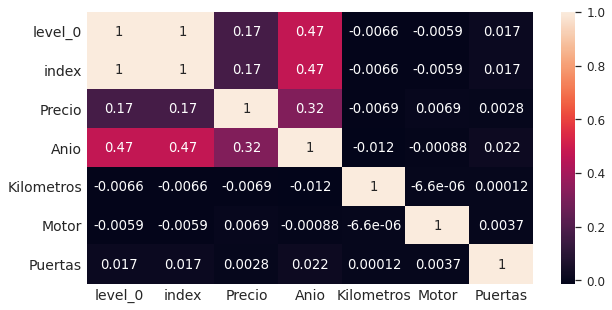

In [2149]:
fig, axs = plt.subplots(figsize = (10,5))
axs.tick_params(axis = 'y', labelsize = 14, pad = 5)
axs.tick_params(axis = 'x', labelsize = 14, pad = 5)
sns.set(font_scale = 1.1)
sns.heatmap(df.corr(), annot = True)
plt.show() 

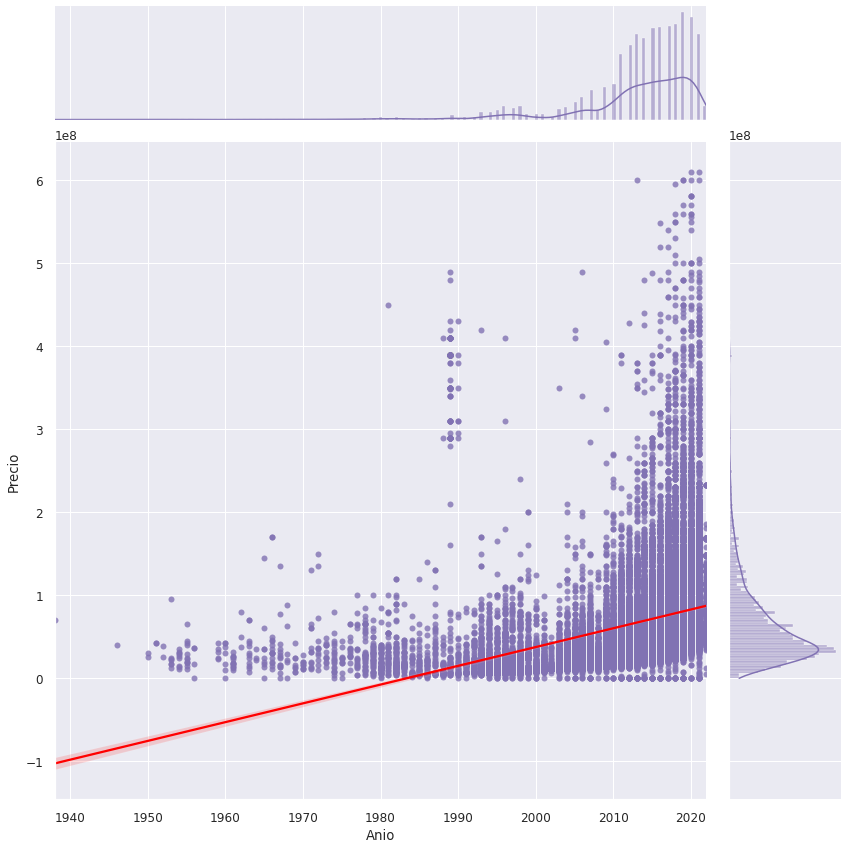

In [2150]:
plot = sns.jointplot(data = df, x = 'Anio', y = 'Precio', height = 12, kind = 'reg', color='m', line_kws={'color': 'red'})
plt.show()